(0.0, 0.999744)

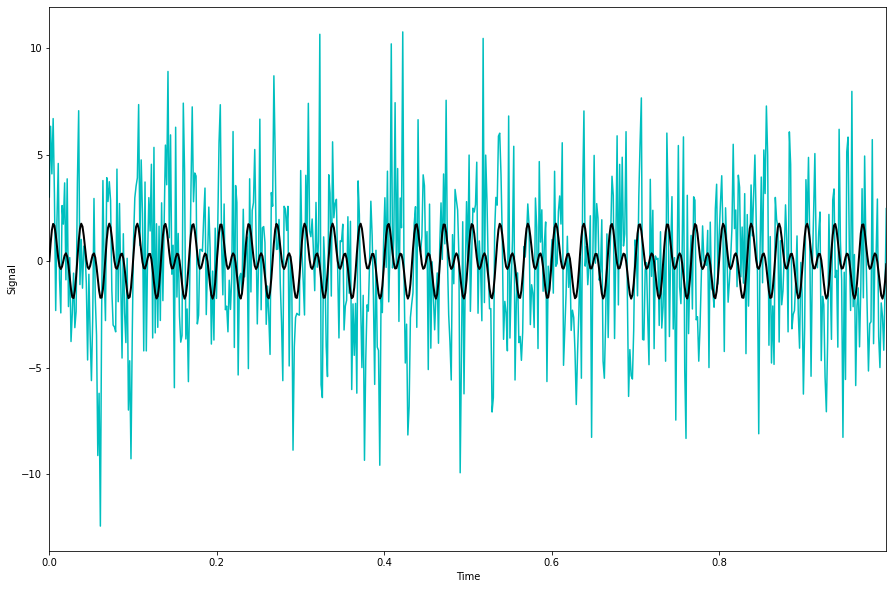

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,10]#creating signals

dt = 0.001524 #interval_width
t = np.arange(0,1,dt)
f=np.sin(2*np.pi*30*t) + np.sin(2*np.pi*60*t)
f_pure = f
f=f+3.2*np.random.randn(len(t)) #adding noise


plt.plot(t,f,color='c',linewidth=1.5,label='Noisy')
plt.plot(t,f_pure,color='k',linewidth=2,label='Pure')
plt.xlabel("Time")
plt.ylabel("Signal")
plt.xlim(t[0],t[-1])#cyan-noise, black-pure

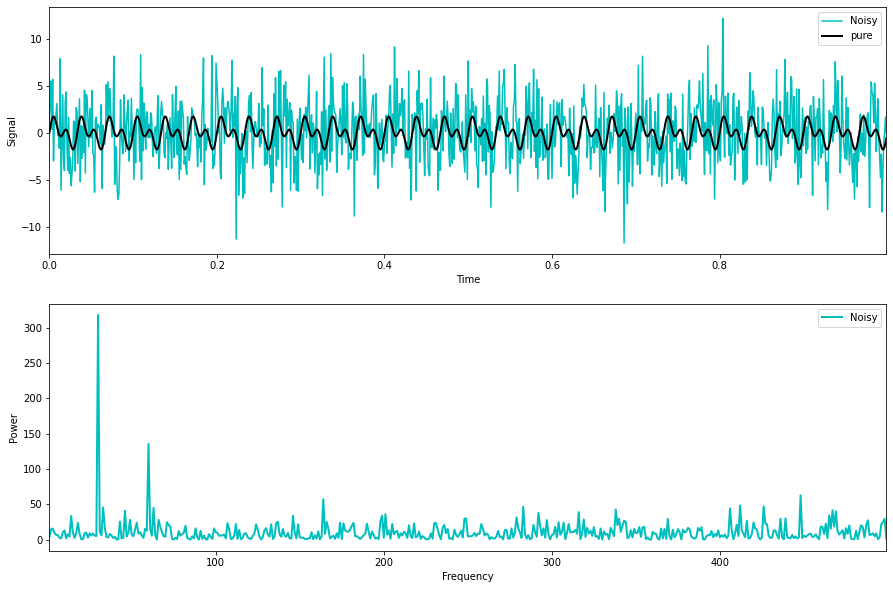

In [70]:
plt.rcParams['figure.figsize'] = [15,10]
n=len(t)
fhat=np.fft.fft(f,n)#using fft
#the output of numpys fft.fft is complex, so we multiply it with its conjugate to obtain the power spectrum of the noisy signal
psd=fhat * np.conj(fhat) /n
freq=(1/(dt*n))*np.arange(n)
#taking the first half
l=np.arange(1,np.floor(n/2),dtype='int')
fig,axs=plt.subplots(2,1)
plt.sca(axs[0])
plt.plot(t,f,color='c',linewidth=1.5,label='Noisy')
plt.plot(t,f_pure,color='k',linewidth=2,label='pure')
plt.xlabel("Time")
plt.ylabel("Signal")
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[l],np.real(psd[l]),color='c',linewidth=2,label='Noisy')
plt.xlim(freq[l[0]],freq[l[-1]])
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.legend()
plt.show()

In [68]:
plt.rcParams['figure.figsize'] = [15,10]
indices= psd>100
psdpure=psd*indices
fhat=indices*fhat
ffilt=np.fft.ifft(fhat)#taking inverse fourier transform to get pure signal

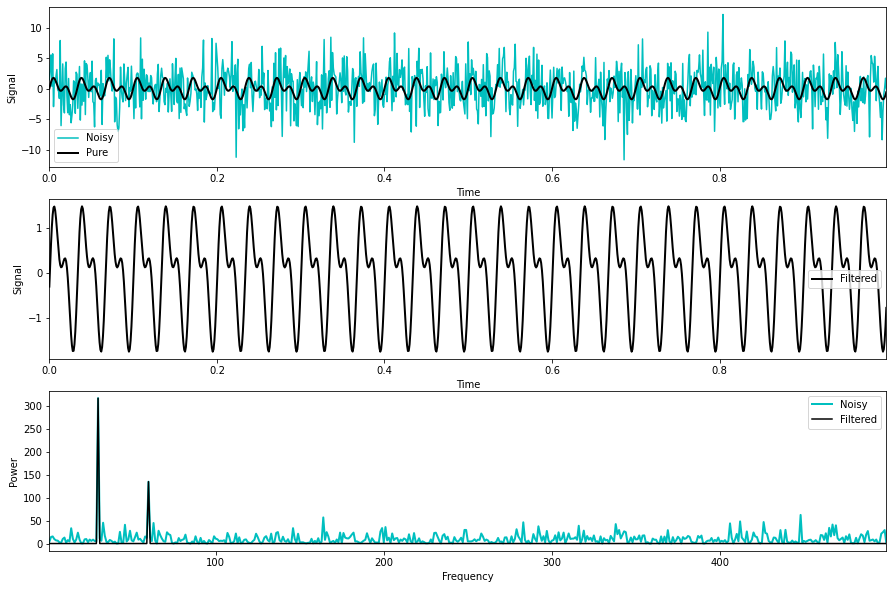

In [69]:
plt.rcParams['figure.figsize'] = [15,10]
fig,axs=plt.subplots(3,1)

plt.sca(axs[0])
plt.plot(t,f,color='c',linewidth=1.5,label='Noisy')
plt.plot(t,f_pure,color='k',linewidth=2,label='Pure')
plt.xlim(t[0],t[-1])
plt.xlabel("Time")
plt.ylabel("Signal")
plt.legend()
plt.sca(axs[1])
plt.plot(t,np.real(ffilt),color='k',linewidth=2,label='Filtered')
plt.xlim(t[0],t[-1])
plt.xlabel("Time")
plt.ylabel("Signal")
plt.legend()
plt.sca(axs[2])
plt.plot(freq[l],np.real(psd[l]),color='c',linewidth=2,label='Noisy')
plt.plot(freq[l],np.real(psdpure[l]),color='k',linewidth=1.5,label='Filtered')
plt.xlim(freq[l[0]],freq[l[-1]])
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.legend()

plt.show()

